# Understanding Descriptive Statistics

Import the necessary libraries here:

In [97]:
# Libraries
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt 
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [53]:
array_1_to_6 = np.arange(start = 1, stop =7)

def dice(n):
    choices = np.random.choice(array_1_to_6,n)
    choice_lst = list(choices)
    return pd.DataFrame(choice_lst)

df_dice = dice(10)
    
df_dice


,0
0,2
1,2
2,3
3,4
4,5
5,1
6,5
7,1
8,3
9,5


#### 2.- Plot the results sorted by value.

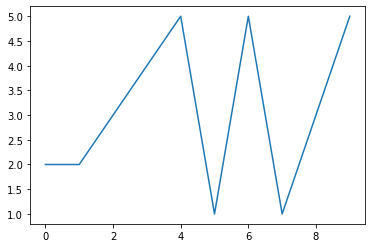

In [54]:
# your code here
plt.plot(df_dice).sort()

In [150]:
df_dice.columns
df_dice_new = df_dice.rename(columns={0:'Result'})
df_dice_new


,Result
0,3
1,4
2,6
3,1
4,1
5,1
6,6
7,6
8,4
9,6


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123d14ed0>]],
      dtype=object)

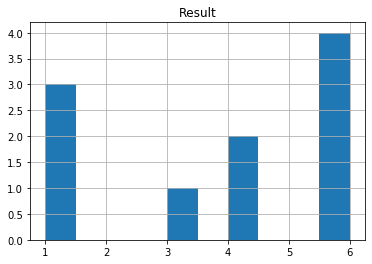

In [101]:
df_dice_new.hist()



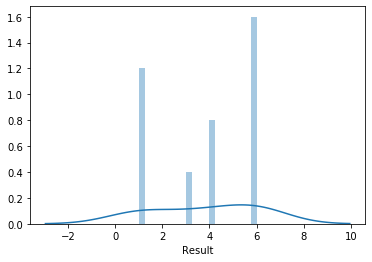

In [100]:
sns.distplot(df_dice_new['Result'], bins=20)


In [ ]:
"""
The above plot shows the absolute frequency of results, whereas the histogram shows the relative frequenc of a result.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [163]:
# your code here
def mean(df,c):
    mean = df.sum()/len(df)
    return (mean.iloc[c])

mean(df_dice_new,0)


3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [227]:
# your code here

df_freq = df_dice_new['Result'].value_counts()/10

df_freq = df_freq.to_frame()

df_freq.head()


,Result
6,0.4
1,0.3
4,0.2
3,0.1


In [230]:
#def freq(df,c):
   # freq = df[c].value_counts()/len(df)
   # return (median.iloc[c])

#freq(df_dice_new,0)

In [184]:
mean(df_freq,0)

2.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [221]:
# your code here
#def median(df,c):
    #srtd_lst = list(df.sort_values(by = df[c]))
    #median = max(len(srtd_lst))
   # return (median.iloc[c])

#median(df_freq,0)

In [264]:
df_dice_lst = df_dice_new['Result'].tolist()

In [268]:
def median(x):
    s = sorted(x)
    if len(x) % 2 == 0:
        i = int(len(x)/2)
        median = (s[i-1] + s[i])/2
    
    else:
        s = int((len(x)/2) + 0.5)
        median = s[i-1]
       
    return median

median(df_dice_lst)

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [293]:
# your code here
    
def quartile(x):
    s = sorted(x)
    if len(x) % 2 == 0:
        i = int(len(x)/2)
        median = (s[i-1] + s[i])/2
    
    else:
        s = int((len(x)/2) + 0.5)
        median = s[i-1]
    
    return [median/2,median,median*1.5, median*2]

quartile(df_dice_lst)


[2.0, 4.0, 6.0, 8.0]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [218]:
# your code here
df_hundred = pd.read_csv('/Users/laurawuerz/Desktop/Ironhack/GitHub/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv', index_col=0)
df_hundred.head()
df_hundred.sort_values(by='value')[:5]




,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1


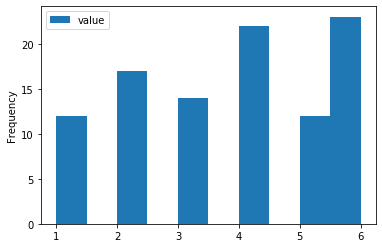

In [243]:
df_hundred.plot(x='roll', y ='value', kind='hist' )

In [ ]:
"""
We can see from the graph that the value 6 has been rolled the most, followed by 4. 1 and 5 have been rolled the least.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [187]:
# your code here
mean(df_hundred,1)

3.74

#### 3.- Now, calculate the frequency distribution.


In [193]:
# your code here
df_freq_hun = df_hundred['value'].value_counts()/10

df_freq_hun = df_freq_hun.to_frame()

df_freq_hun.head()


,value
6,2.3
4,2.2
2,1.7
3,1.4
5,1.2


In [196]:
mean(df_freq_hun,0)

1.6666666666666663

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

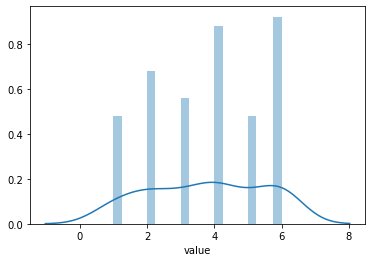

In [231]:
# your code here
sns.distplot(df_hundred['value'], bins=20)

In [ ]:

"""The mean is 3.74 which makes sense since most rolls  rolled most but 1,2 and 3 together were rolled more often than 5 and 6.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [126]:
# your code here
df_thousand = pd.read_csv('/Users/laurawuerz/Desktop/Ironhack/GitHub/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv',index_col=0)
df_thousand.head()

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5


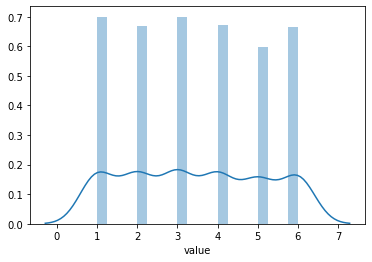

In [127]:
sns.distplot(df_thousand['value'], bins=20)

In [ ]:
"""
It is now more equally distributed. A bigger set of data leads to a more equal distribution.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

   observation
0         68.0
1         12.0
2         45.0
3         38.0
4         49.0


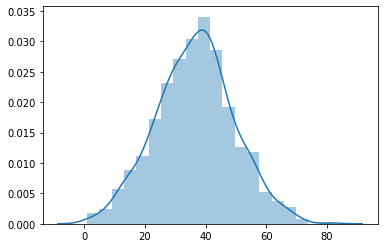

In [214]:
# your code here
df_ages = pd.read_csv('/Users/laurawuerz/Desktop/Ironhack/GitHub/lab-understanding-descriptive-stats/data/ages_population.csv')
print(df_ages.head())

sns.distplot(df_ages, bins=20)




#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [209]:
# your code here
print(df_ages.mean())
print(df_ages.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
"""
YES!
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

   observation
0         25.0
1         31.0
2         29.0
3         31.0
4         29.0


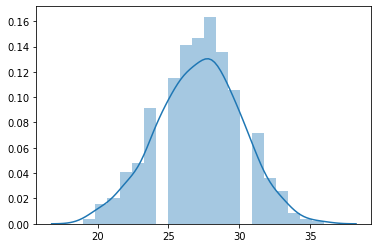

In [213]:
# your code here

df_ages2 = pd.read_csv('/Users/laurawuerz/Desktop/Ironhack/GitHub/lab-understanding-descriptive-stats/data/ages_population2.csv')
print(df_ages2.head())

sns.distplot(df_ages2, bins=20)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The data is much less spread out than in the previous dataset (approx. 15-40 vs. 0-80). Therefore the std will be smaller.
The mean is at around 27.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [206]:
# your code here
print(df_ages2.mean())
print(df_ages2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
see above
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

   observation
0         21.0
1         21.0
2         24.0
3         31.0
4         54.0


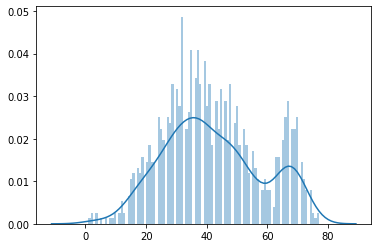

In [212]:
# your code here

df_ages3 = pd.read_csv('/Users/laurawuerz/Desktop/Ironhack/GitHub/lab-understanding-descriptive-stats/data/ages_population3.csv')
print(df_ages3.head())

sns.distplot(df_ages3, bins=100)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [215]:
# your code here
print(df_ages3.mean())
print(df_ages3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
The mean has shifted to the right (because of the peak in the right half). The standard deviation has decreased.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [289]:
# your code here
df_ages3_lst = df_ages3['observation'].tolist()
#df_ages3_lst

In [287]:
quartile(df_ages3_lst)

[20.0, 40.0, 60.0, 80.0]

In [ ]:
"""
There is only a small difference between the median(40) and the mean(41.989). The distribution became more normally distributed.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [298]:
# your code here
print(df_ages3.quantile(q=0.25))
print(df_ages3.quantile(q=0.1))

observation    30.0
Name: 0.25, dtype: float64
observation    22.0
Name: 0.1, dtype: float64


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""